In [2]:
import os 
path = '/Users/athena.kam/Documents/Thesis/codebase/thesis-2023-athena'
os.chdir(path)

In [3]:
from sklearn.manifold import TSNE
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('datasets/transformed/spontaneousDialogueOnly_google_bert_embeddings_transformed.csv')
include_personal_q = False
if include_personal_q:
        df = df[df['noPersonalQ']!=1]
else:
    df = df[df['personalQ']!=1]
headers = df.columns
non_embeddings_headers = []
for header in headers:
    if header.find('embbedings')<0:
        non_embeddings_headers.append(header)

X = df.drop(columns=non_embeddings_headers)
Y = df['classification']



In [5]:
from sklearn.discriminant_analysis import StandardScaler


x_val = X.values
display(x_val)
x_val = StandardScaler().fit_transform(x_val)
display(x_val)
display(x_val.shape)

array([[ 0.08303028, -0.21260752,  0.54635304, ..., -0.20327425,
         0.12859735, -0.13606693],
       [ 0.07697948, -0.41965404,  0.55615896, ..., -0.21489909,
         0.23080313, -0.16488293],
       [-0.03703839, -0.2024736 ,  0.45683667, ..., -0.36336514,
         0.41618946,  0.05263509],
       ...,
       [ 0.12661214, -0.24520111,  0.5681811 , ...,  0.10486158,
        -0.15446703, -0.27761146],
       [ 0.2201447 , -0.28567073,  0.8877815 , ..., -0.14558347,
        -0.00116703,  0.04842565],
       [ 0.11403245, -0.49727145,  0.24626422, ..., -0.04310585,
         0.11931741, -0.18225552]])

array([[-0.52205247,  1.09126503, -0.36257181, ..., -0.09098052,
         0.26102531, -0.07185965],
       [-0.56091124, -0.09388502, -0.30460435, ..., -0.16380815,
         0.79628014, -0.26357968],
       [-1.29314448,  1.14927237, -0.89174576, ..., -1.09392228,
         1.76715406,  1.18362197],
       ...,
       [-0.24216571,  0.90469683, -0.23353576, ...,  1.83943716,
        -1.22139158, -1.01359075],
       [ 0.35850901,  0.67304567,  1.65577462, ...,  0.27044226,
        -0.41855472,  1.15561552],
       [-0.32295367, -0.53817296, -2.13653993, ...,  0.91244682,
         0.21242595, -0.37916387]])

(36, 768)

In [6]:
import numpy as np
np.mean(x_val),np.std(x_val)

(1.5259141686833026e-18, 1.0)

In [7]:
feat_cols = ['feature'+str(i) for i in range(x_val.shape[1])]

In [8]:
from sklearn.decomposition import PCA
pca_30 = PCA(n_components=30)
principalComponents_30 = pca_30.fit_transform(x_val)
col_names = [] 
for i in range(30):
    col_names.append('PC'+str(i+1))
principal_30_components_df = pd.DataFrame(data = principalComponents_30, columns=col_names)

In [14]:
principalComponents_30
principalComponents_30.shape[1]

30

In [10]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
principalComponents_2 = pca_2.fit_transform(x_val)
col_names = []
for i in range(2):
    col_names.append('PC'+str(i+1))
principal_2_components_df = pd.DataFrame(data = principalComponents_2, columns=col_names)

0     False
1     False
2      True
3     False
4      True
5     False
6     False
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17     True
18     True
19    False
20     True
21    False
22    False
23    False
24     True
25    False
26    False
27     True
28    False
29     True
30     True
31    False
32     True
33     True
34    False
35    False
Name: classification, dtype: bool

,PC1,PC2
0,-10.334685,4.297697
1,-10.133032,0.226138
2,-19.461283,13.661759
3,-4.852050,-4.872058
4,-6.576559,-0.450290
5,-1.688435,-3.361341
6,-11.247877,-3.323565
7,-2.847391,-0.190358
8,-4.049830,13.227111
9,-13.011442,1.538115


,PC1
2,-19.461283
4,-6.576559
7,-2.847391
8,-4.049830
14,2.273099
17,-3.560754
18,23.000723
20,14.860117
24,6.061522
27,-4.348633


0      True
1      True
2     False
3      True
4     False
5      True
6      True
7     False
8     False
9      True
10     True
11     True
12     True
13     True
14    False
15     True
16     True
17    False
18    False
19     True
20    False
21     True
22     True
23     True
24    False
25     True
26     True
27    False
28     True
29    False
30    False
31     True
32    False
33    False
34     True
35     True
Name: classification, dtype: bool

,PC1,PC2
0,-10.334685,4.297697
1,-10.133032,0.226138
2,-19.461283,13.661759
3,-4.852050,-4.872058
4,-6.576559,-0.450290
5,-1.688435,-3.361341
6,-11.247877,-3.323565
7,-2.847391,-0.190358
8,-4.049830,13.227111
9,-13.011442,1.538115


,PC1
0,-10.334685
1,-10.133032
3,-4.852050
5,-1.688435
6,-11.247877
9,-13.011442
10,-20.944435
11,-14.467757
12,-0.082838
13,-9.145520


<Figure size 640x480 with 0 Axes>

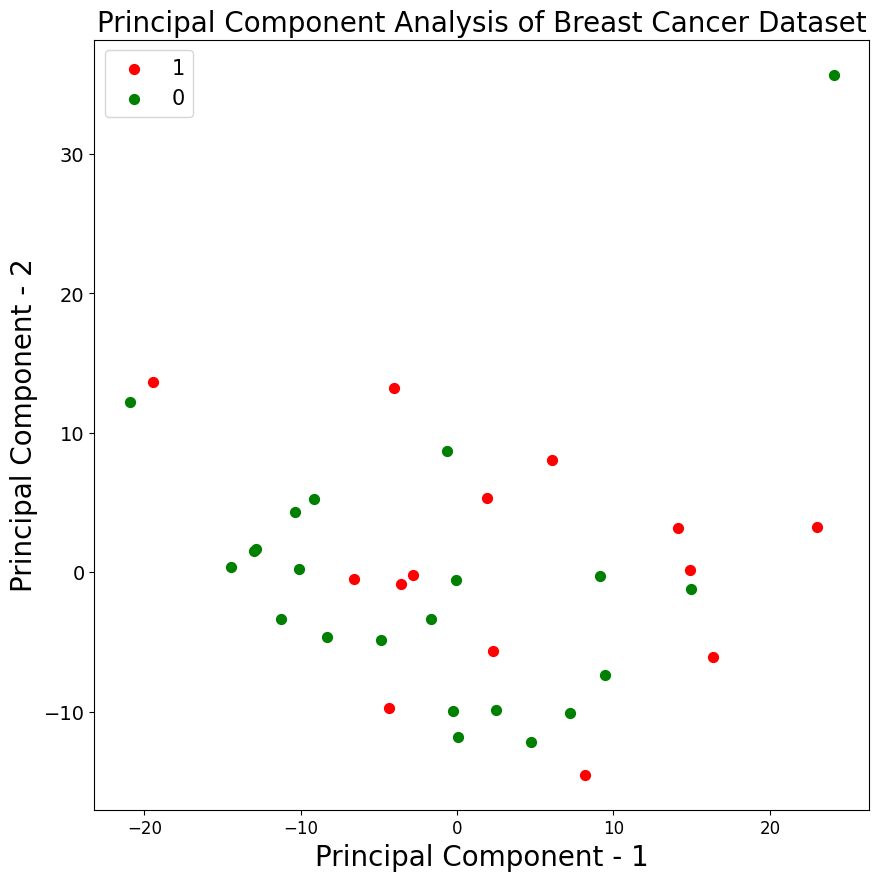

In [11]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [1, 0]
colors = ['r', 'g']
Y_reindex = Y.reset_index(drop=True)
for target, color in zip(targets,colors):
    indicesToKeep = Y_reindex == target
    display(indicesToKeep)
    display(principal_2_components_df)
    display(principal_2_components_df.loc[indicesToKeep, ['PC1']])
    plt.scatter(principal_2_components_df.loc[indicesToKeep, 'PC1']
               , principal_2_components_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})